# Function get result convert

In [83]:
def get_result(incoming_currency: str = None, resulting_currency: str = None, lag_days: int = None, api_key:str = None):
    import requests
    import json
    from datetime import date, timedelta, datetime
    if incoming_currency or resulting_currency or lag_days:
       print("Start get result")
    else:
        raise Exception("Pleas append params")
    start_date = date.today() - timedelta(days=lag_days)

    result = []

    for i in range(0, lag_days):
        check_date = start_date + timedelta(days=i)
        url = f'https://api.apilayer.com/fixer/convert?to={resulting_currency}&from={incoming_currency}&amount=1&date={str(check_date)}'
        payload = {}
        if not api_key:
          raise Exception('Please enter your api key')
        else:
          headers= {
          "apikey": f"{api_key}"
          }

        response = requests.request("GET", url, headers=headers, data = payload)

        status_code = response.status_code
        result_batch = response.text

        result.append((check_date,json.loads(result_batch)['result']))
    print("Finish!")
    return result

#RUN

In [84]:
result_EUR_USD = get_result('USD', 'EUR', 14, "2EqaE1zSREsMwFJ9F5ntA8ZbMvuvgTKh")
print(result_EUR_USD)

Start get result
Finish!
[(datetime.date(2023, 6, 22), 0.912602), (datetime.date(2023, 6, 23), 0.914804), (datetime.date(2023, 6, 24), 0.914804), (datetime.date(2023, 6, 25), 0.9169), (datetime.date(2023, 6, 26), 0.91658), (datetime.date(2023, 6, 27), 0.91267), (datetime.date(2023, 6, 28), 0.91613), (datetime.date(2023, 6, 29), 0.92016), (datetime.date(2023, 6, 30), 0.91605), (datetime.date(2023, 7, 1), 0.91605), (datetime.date(2023, 7, 2), 0.916899), (datetime.date(2023, 7, 3), 0.91636), (datetime.date(2023, 7, 4), 0.918796), (datetime.date(2023, 7, 5), 0.921201)]


In [85]:
result_MXN_USD = get_result('USD', 'MXN', 14, "2EqaE1zSREsMwFJ9F5ntA8ZbMvuvgTKh")
print(result_MXN_USD)

Start get result
Finish!
[(datetime.date(2023, 6, 22), 17.184899), (datetime.date(2023, 6, 23), 17.162904), (datetime.date(2023, 6, 24), 17.162904), (datetime.date(2023, 6, 25), 17.162105), (datetime.date(2023, 6, 26), 17.13199), (datetime.date(2023, 6, 27), 17.091402), (datetime.date(2023, 6, 28), 17.097895), (datetime.date(2023, 6, 29), 17.121097), (datetime.date(2023, 6, 30), 17.124304), (datetime.date(2023, 7, 1), 17.124304), (datetime.date(2023, 7, 2), 17.12331), (datetime.date(2023, 7, 3), 17.061898), (datetime.date(2023, 7, 4), 17.050497), (datetime.date(2023, 7, 5), 17.00858)]


#RESULT

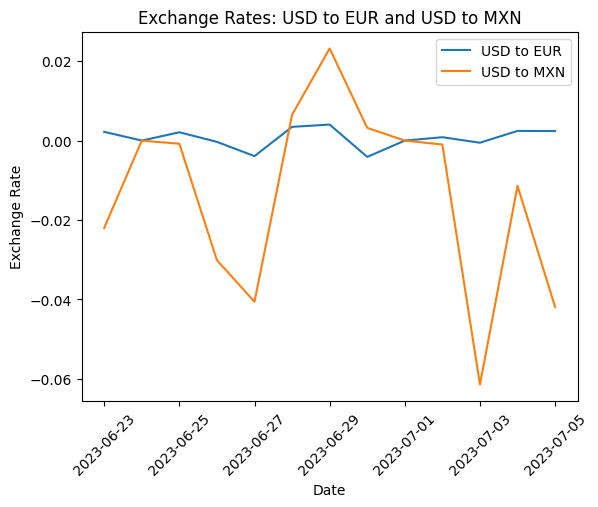

In [86]:
import matplotlib.pyplot as plt

dates = list()
usd_to_eur = list()
mxn_to_eur = list()
fisrt_value_usd = result_EUR_USD[0][1]
fisrt_value_mxn = result_MXN_USD[0][1]
for i in range(1, len(result_EUR_USD)):
  dates.append(result_EUR_USD[i][0])
  usd_to_eur.append(result_EUR_USD[i][1] - fisrt_value_usd)
  fisrt_value_usd = result_EUR_USD[i][1]
  mxn_to_eur.append(result_MXN_USD[i][1] - fisrt_value_mxn)
  fisrt_value_mxn = result_MXN_USD[i][1]

plt.plot(dates, usd_to_eur, label='USD to EUR')
plt.plot(dates, mxn_to_eur, label='USD to MXN')


plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.title('Exchange Rates: USD to EUR and USD to MXN')
plt.xticks(rotation=45)
plt.legend()


plt.show()